<a href="https://colab.research.google.com/github/V1PASH/PYTORCH/blob/main/spirals_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

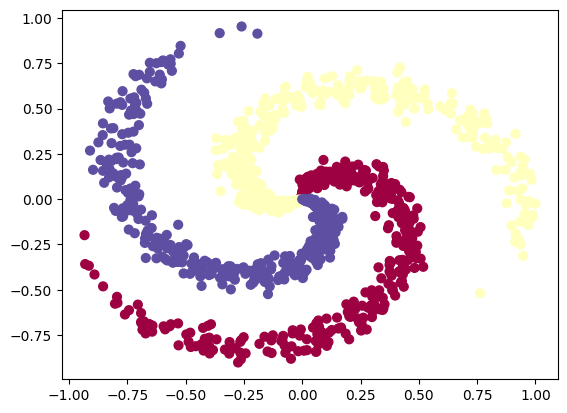

In [ ]:
N = 350 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [ ]:
X.shape,y.shape

((1050, 2), (1050,))

In [ ]:
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
y.shape

torch.Size([1050])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test.shape,x_train.shape

(torch.Size([210, 2]), torch.Size([840, 2]))

## Model building

In [ ]:
class spiral(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers=nn.Sequential(nn.Linear(in_features=2,out_features=10),
                              nn.ReLU(),
                              nn.Linear(in_features=10,out_features=10),
                              nn.ReLU(),
                              nn.Linear(in_features=10,out_features=10),
                              nn.ReLU(),
                              nn.Linear(in_features=10,out_features=3),
                              nn.ReLU()
                              )
  def forward(self,x):
    return self.layers(x)

In [ ]:
model0=spiral()

In [ ]:
model0.eval()

with torch.inference_mode():
  pred=torch.softmax(model0(x_test),dim=1)

In [ ]:
pred[:5]

tensor([[0.2857, 0.3301, 0.3842],
        [0.2856, 0.3311, 0.3833],
        [0.2850, 0.3306, 0.3843],
        [0.2858, 0.3300, 0.3842],
        [0.2856, 0.3302, 0.3843]])

In [ ]:
pred=torch.argmax(pred,dim=1)
pred

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## plot

In [ ]:
import requests

from pathlib import Path

# download helper function from pytorch repo

if Path("helper_function.py").is_file():
  print("have")
else:
  print("download")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb")as f:
    f.write(request.content)

download


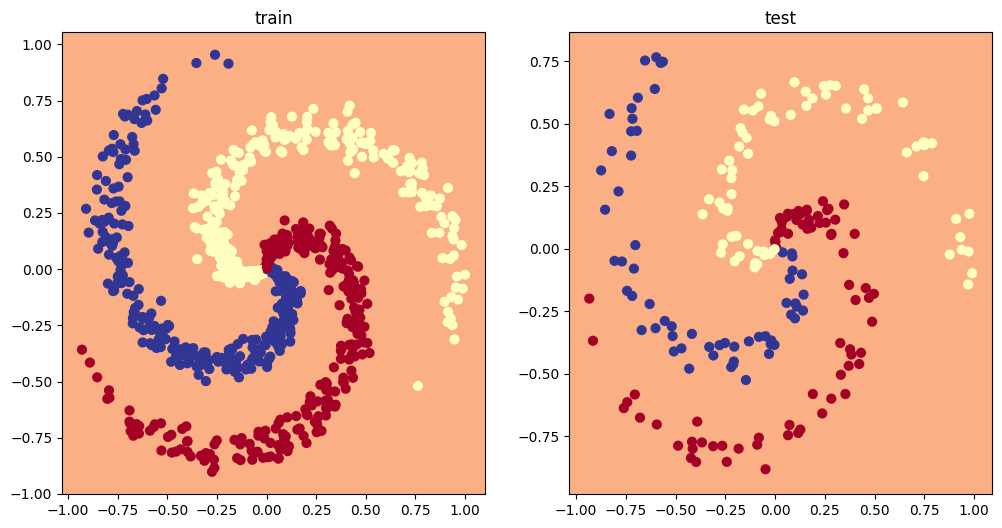

In [ ]:
#plot decision boundery of model
from helper_functions import plot_predictions ,plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model0,x_test,y_test)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))*100
  return acc

In [ ]:
accuracy_fn(y_true=y_test,y_pred=pred)

29.523809523809526

##loss fn

In [ ]:
loss_fn=torch.nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(params=model0.parameters(),lr=0.012)

##loop

In [ ]:
epochs=100

for epoch in range(epochs):

  y_logits=model0(x_train)

  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_train.type(torch.long))

  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model0.eval()

  with torch.inference_mode():
    test_logits=model0(x_test)

    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,y_test.type(torch.long))

    test_acc=accuracy_fn(y_true=y_test,y_pred=test_preds)
  if epoch%50==0:
    print(f" {epoch} train loss {loss} | acc {acc} || test loss {test_loss} | acc {test_acc}")


In [ ]:
model0.eval()
with torch.inference_mode():
  preds=torch.softmax(model0(x_test),dim=1).argmax(dim=1)

In [ ]:
accuracy_fn(y_true=y_test,y_pred=preds)

36.19047619047619

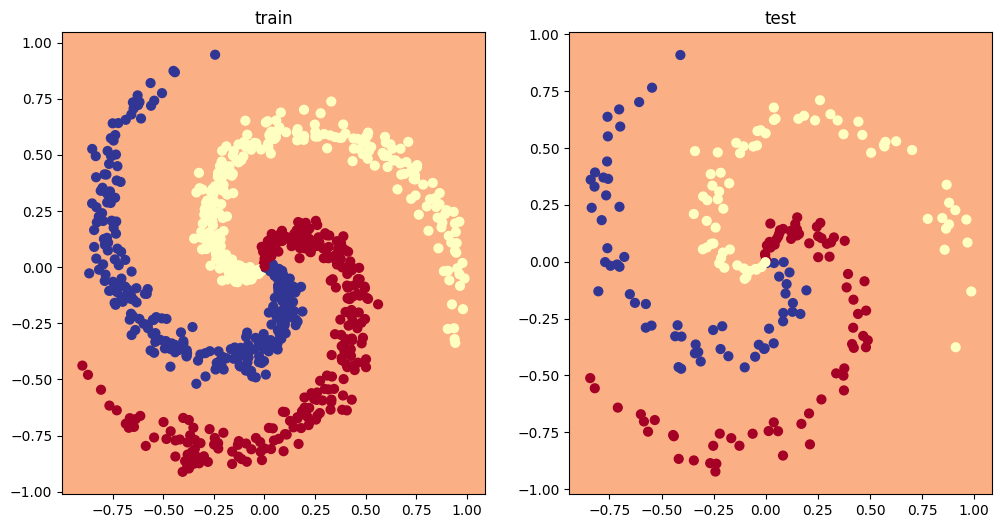

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model0,x_test,y_test)